In [29]:
import seaborn as sns
import sklearn as sk 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

In [3]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [4]:
# creating a subset of the data for the area, amount of rooms and the price.
df_subset = df[['area', 'price','rooms']]

In [5]:
df_subset = df_subset[df_subset['price'] > 30000]
df_subset = df_subset[df_subset['rooms'] >= 1]
df_subset = df_subset[df_subset['area'] >= 1]

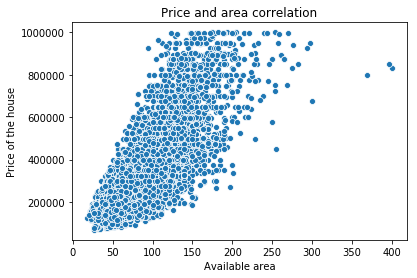

In [6]:
sns.scatterplot(x="area", y="price", data=df_subset)
plt.xlabel('Available area')
plt.ylabel('Price of the house')
plt.title('Price and area correlation')
plt.show()

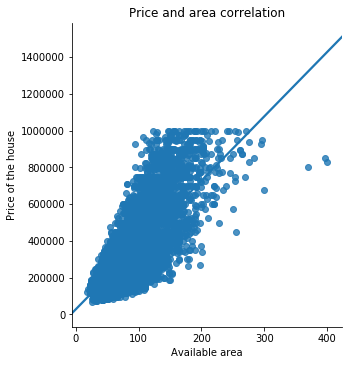

In [7]:
sns.lmplot(x="area", y="price", data=df_subset, ci= False)
plt.xlabel('Available area')
plt.ylabel('Price of the house')
plt.title('Price and area correlation')
plt.show()

In [8]:
# filling in the right info for the formula
x = df[['area']] 
y = df['price']
lm = LinearRegression()
lm.fit(x, y) 

b0 = lm.coef_[0]
b1 = lm.intercept_ 

$ y = 3498.81 + 27983.93X$ 

In [9]:
df['p_price'] = lm.predict(x) #generate the predictions and add them to the dataframe
df['residuals'] = df['price'] - df['p_price'] #get the residuals by subtracting the prediction from the actual views

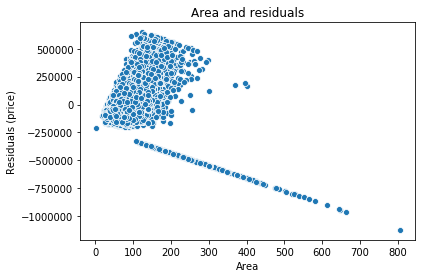

In [16]:
sns.scatterplot(x='area',y='residuals',data=df)
plt.title('Area and residuals')
plt.xlabel('Area')
plt.ylabel('Residuals (price)')
plt.show()

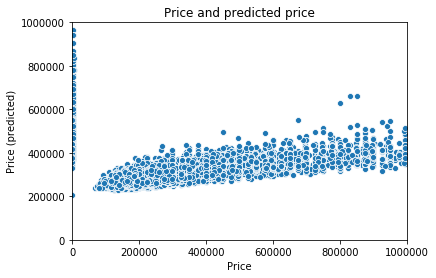

In [20]:
sns.scatterplot(x='price',y='p_price',data=df)
plt.xlim(0, 1000000) #This sets the x-axis limits to (0, 5e10 = 5000000000)
plt.ylim(0, 1000000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.title('Price and predicted price')
plt.xlabel('Price')
plt.ylabel('Price (predicted)')
plt.show()

In [27]:
r2_score = r2_score(df['price'], df['p_price'])
print(f'The R^2 score is: {r2_score}')

The R^2 score is: 0.09764871906008399


In [33]:
rmse = math.sqrt(mean_squared_error(df['price'], df['p_price']))
print(f'The RMSE (root mean squared error) is €{rmse}.')

The RMSE (root mean squared error) is €168566.4358478545.


The R^2 score is nearly 10%, so very low. This means that the model is not realiable. <br>
The RMSE score is 168566.4358478545, which means that the precition is typically €168566,44 off. <br>

The cheap houses are predicted better, since the scatterplot shows how the dots are closer to eachother, showing less variance. 